# 2. Kinematics of Serial Robots: Position Analysis

# 2.2 Robots as Mechanisms

# 2.4.1 Representation of a Point in Space

- i, j and k are unit vectors.
- These vectors usually represent x, y and z cartesian coordinates 
- The Point can be represented as a vector in "vector form"
  - P = 3i + 5j + 2k
- 3i means you are moving 3 units along the x axis
- If the units are in meters, then we are moving 3 meters long the x axis
  - i is the unit vector in the x direction. It has a magnitude of 1 and points along the positive x axis
  - j is the unit vector in the y direction. It has a magnitude of 1 and points along the positive y axis
  - k is the unit vector in the z direction. It has a magnitude of 1 and points along the positive z axis
- So for the above vector:
  - 3i means move 3 units along the x axis
  - This is a formula rather than an equation
    - It provides a way to calculate the position vector P
    - An equation states that two expressions are equal

# 2.4.2 Representation of a Vector in Space

- The below code demonstrates how to calculate a vector and its magnitude 
- We are subtracting the coordinates of the starting point from the coordinates of the ending point

In [1]:
import numpy as np

# A = np.array([1, 2, 3])

A = np.array([0, 0, 0])
B = np.array([4, 6, 8])
P_AB = B - A

print(f"Vector P_AB = {P_AB[0]}i + {P_AB[1]}j + {P_AB[2]}k")


Vector P_AB = 4i + 6j + 8k


- Direction Vector
- When the scale component w is zero
- Converting from Matrix to Cartesian (I think?)
- We divide each component by the weight
- If Px, Py and Pz are divided by w then we get Ax, Ay, Az

In [2]:
np.array([2,3,4]) / 0
np.array([2,3,4]) / 1
np.array([2,3,4]) / 2



C:\Users\James\AppData\Local\Temp\ipykernel_24700\559588662.py:1: RuntimeWarning: divide by zero encountered in divide
  np.array([2,3,4]) / 0


array([1. , 1.5, 2. ])

Example 2.1
- A vector is described as P = 3i + 5j + 2k, express it as matrix form:
1. With a scale factor of 2
2. If it were to describe a direction as a unit vector

In [3]:
import numpy as np
import math

In [4]:
P = np.array([3,5,2])
P * 2

array([ 6, 10,  4])

Converting a Vector into a Unit Vector
- Normalize the length (magnitude) to be equal to 1.
- Each component (element) is divided by the "square root of the sum of the squares of all (three) components"
1. Square each component
2. Add the squares together
3. Find the square root of the sum
4. Divide each of the components by this sum

In [5]:
sq_Sum = math.sqrt(3**2 + 5**2 + 2**2)
sq_Sum

6.164414002968976

In [6]:
UnitV = P / sq_Sum
UnitV

array([0.48666426, 0.81110711, 0.32444284])

In [7]:
math.sqrt(UnitV[0]**2 + UnitV[1]**2 + UnitV[2]**2)

1.0

Example 2.2
- A Vector P is 5 units long and is in the direction of unit vector q described as follows:
- Express the vector in matrix form:

In [8]:
q = None
q_unit = np.array([0.371, 0.557, q])

In [9]:
q = math.sqrt(1 - (0.371**2 + 0.557**2))
q

0.7430410486642041

In [10]:
q_unit = np.array([0.371, 0.557, q])
q_unit * 5

array([1.855     , 2.785     , 3.71520524])

# 2.4.3 Representation of a Frame at the Origin of a Fixed Reference Frame

# 2.4.4 Representation of a Frame Relative to a Fixed Reference Frame

- A frame can be expressed by it's three "directional vectors" and it's single "position vector"
- The frame is expressed by it's three vectors describing it's directional "unit vectors" and a fourth vector describing it's location
- So we have 9 pieces of information for the frame's orientation - 3x3 matrix
- And we have 3 pieces of information for the frames's position - x,y and z vector

Example 2.3

In [11]:
degree = 45
math.radians(degree)
np.sqrt(2) / 2
math.sin(math.radians(degree))

0.7071067811865476

In [12]:
r = math.radians(90)
rX = np.array([
    [1, 0, 0],
    [0, math.cos(r), -math.sin(r)],
    [0, math.sin(r), math.cos(r)]
])

rY = np.array([
    [math.cos(r), 0, math.sin(r)],
    [0, 1, 0],
    [-math.sin(r), 0, math.cos(r)]
])

rZ = np.array([
    [math.cos(r), -math.sin(r), 0],
    [math.sin(r), math.cos(r), 0],
    [0, 0, 1]
])

# 2.4.5 Representation of a Rigid Body

In [13]:
print("As before, a frame can be represented by a matrix, where the origin of the frame and the three vectors representing its orientation relative to the reference frame are expressed")

np.array([
    ["nx", "ox", "ax", "px"],
    ["ny", "oy", "ay", "py"],
    ["nz", "oz", "az", "pz"],
    [0, 0, 0, "w"]
])

As before, a frame can be represented by a matrix, where the origin of the frame and the three vectors representing its orientation relative to the reference frame are expressed


array([['nx', 'ox', 'ax', 'px'],
       ['ny', 'oy', 'ay', 'py'],
       ['nz', 'oz', 'az', 'pz'],
       ['0', '0', '0', 'w']], dtype='<U11')

- A point in space only has three DOF, it can only move along the x,y and z axis
- A rigid body in space has six DOF, it can move along the x,y and z axis and also rotate and spin on these three axis as well
- All that is needed to full describe a rigid body in space is 6 pieces of information
- However, in the matrix we have 12 pieces of information:
  - We have a 3x3 matrix - so 9 pieces of information
  - Plus a vector of 3 components - so another 3 pieces of information
  - Excluding the scale factors on the last row
- So we need "six constraint equations" to reduce the pieces of information from 12 to 6

# The Constraint Equations

The Constraint Equations come from known characteristics of a frame; they are:  
1. The three unit vectors n,o and a are mutually perpendicular
2. Each unit vector representing directional cosines must be equal to 1

These constraints translate into the following six constraint equations:  

Dot Products must equal ZERO (Remember $\cdot$ and 0 are similar signs)
- n $\cdot$ o = |n| * |o| * cos(theta) = 0 (the dot product (result is a scalar) of n and o must be zero)
- n $\cdot$ a = 0
- a $\cdot$ o = 0

Unit Vectors must equal ONE (Remember 1 and | are similar signs)
- |n| = √(Nx<sup>2</sup> + Ny<sup>2</sup> + Nz<sup>2</sup>) = 1 (the magnitude of the length of the vector must be 1 eg: Unit Vector)
- |o| = 1 
- |a| = 1


We use Pythagoras Theorem to calculate the magnitude: |n| = √(x<sup>2</sup> + y<sup>2</sup>)

- The values in a frame must satisfy the above equations, otherwise the frame is incorrect
- Note the dot product is a scalar, not a vector
- So to ensure the right-hand rule is followed, we can instead use the Cross Product method:  
  

<div style="text-align: center;font-weight: bold">
n x o = a   
</div>  


- It is recommended that the Cross Product equation be used as it determines the correct relationship among the three vectors

Example 2.4

- Find the values of the missing components in the below frame
- The vector 5,3,2 is the position of the origin of the frame and does not affect the Constraint Equations
- Note that only three values for the directional vectors are given, this is all that is needed
- We then use the Six Constraint Equations from above

In [14]:
np.array([
    ["?",    0,     "?",    5],
    [0.707, "?",    "?",    3],
    ["?",   "?",    0,      2],
    [0,     0,      0,      1]
])
np.array([
    [None,      0,       None,    5],
    [0.707,     None,    None,    3],
    [None,      None,    0,       2],
    [0,         0,       0,       1]
])

array([[None, 0, None, 5],
       [0.707, None, None, 3],
       [None, None, 0, 2],
       [0, 0, 0, 1]], dtype=object)

# Dot Product
Ways to calculate the dot product (answer is a scalar and is zero)

1. Using the magnitudes and Cosines of the angle:  
n $\cdot$ o = |n| $\cdot$ |o| $\cdot$ cos(theta) = 0

2. Using the Component-wise Multiplication  
n $\cdot$ o = (n<sub>x</sub>  $\cdot$  o<sub>x</sub>) + (n<sub>y</sub>  $\cdot$  o<sub>y</sub>) + (n<sub>z</sub>  $\cdot$  o<sub>z</sub>) = 0  

- However, the problem is that it's possible to have two sets of mutually perpendicular vectors in opposite directions. Meaning we get two frames ref page 44 - F1 and F1.


# Cross Product - **n x o = a**
Calculating the Cross Product (think cross for multiplication)  
The result is a a third vector that is perpendicular to the plane formed by the original two vectors  
We then have a frame that applies the right-hand rule and is correct    

Figure 2.12

In [15]:
# Define the vectors n and o
n = np.array([2, 3, 4])
o = np.array([5, 6, 7])

# Calculate the cross product
np.cross(n, o)

array([-3,  6, -3])

Example 2.5

Steps to solve missing components in a matrix that is already converted to a Unit Vector:  
1. Solve the Unit Vectors (the vector's magnitude must equal 1)
   1. Note that the vector is already a Unit Vector. So there is no Square Root radical, the vector has already been normalized to 1.
2. Solve the Dot Product (the result from vector N and vector O must be a scalar and equal 0)
3. Solve the Cross Product (the result must be a third vector which is vector A)

In [16]:
N = np.array([0.866, 0.5, 0])
O = np.array([0, 0, 1])
np.cross(N,O)

array([ 0.5  , -0.866,  0.   ])

In [17]:
# i (Ny * Oz - Nz * Oy)


In [18]:
Nx = None
Oy = None
Oz = None
Ax = None
Ay = None
Ax = None

np.array([
    [Nx,        0,       Ax,    3],
    [0.5,       Oy,      Ay,    9],
    [0,         Oz,      Ax,    7],
    [0,         0,       0,     1]
])

array([[None, 0, None, 3],
       [0.5, None, None, 9],
       [0, None, None, 7],
       [0, 0, 0, 1]], dtype=object)

# 2.5 Homogeneous Transformation Matrices

- Meaning a 4x4 matrix
- A standard for multiplying matrices because they are the same size, also known as the same dimensions

# 2.6 Representation of Transformations

- A transformation is defined as making a movement in space
- When a frame (a vector, object or a moving frame) moves in space relative to a fixed reference frame, we represent this motion in a form similar to a frame representation
- This is because a transformation is a change in the state of frame
- A transformation may be in one of the following forms:
1. A pure translation
2. A pure rotation about an axis
3. A combination of translation and rotation 

# 2.6.1 Representation of a Pure Translation
- When a point, vector or object moves in space without any rotation
- The direction unit vectors remain unchanged 
- Only the origin of the frame relative to the reference frame changes
- We also pre-multiply the moving frame by the transformation frame

In [19]:
F = np.array([
    [0.527,     -0.574, 0.628,  8],
    [0.369,     0.819,  0.439,  10],
    [-0.766,    0,      0.643,  6],
    [0,         0,      0,      1]
])

T = np.array([
    [1,0,0,3],
    [0,1,0,0],
    [0,0,1,2],
    [0,0,0,1]
])

T @ F

array([[ 0.527, -0.574,  0.628, 11.   ],
       [ 0.369,  0.819,  0.439, 10.   ],
       [-0.766,  0.   ,  0.643,  8.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

# 2.6.2 Representation of a Pure Rotation about an Axis

- The example explains a reference frame x,y,z and a rotating frame n,o,a
- There is also a point P attached to the rotating frame
- As the rotating frame moves, point P remains in the same coordinate position of the rotating frame
- However, relative to the reference frame, point P changes it's x,y,z coordinates
- There is the following example with lengths, addition and subtraction but I'll move on.
- We also pre-multiply the moving frame by the rotation matrix
- The result is the new coordinates relative to the reference frame

In [20]:
r = math.radians(90)
np.array([
    [1, 0, 0],
    [0, math.cos(r), -math.sin(r)],
    [0, math.sin(r), math.cos(r)]
])

array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  6.123234e-17, -1.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  6.123234e-17]])

- Denoting the Transformation as <sup>U</sup>T<sub>R</sub>
- Meaning the Transformation of R relative to U
- P<sub>xyz</sub> = Rot(x,theta) x P<sub>noa</sub>
- Can be rewritten as:
- <sup>U</sup>P = <sup>U</sup>T<sub>R</sub> x <sup>R</sup>P

Example 2.7
- p[2, 3, 4]<sup>T</sup>
- The T means to Transpose, meaning this vector should be transposed to a column vector.

In [21]:
p = np.array([[2],[3],[4]])
p

array([[2],
       [3],
       [4]])

In [22]:
p.T

array([[2, 3, 4]])

In [23]:
r = math.radians(90)
rX = np.array([
    [1, 0, 0],
    [0, math.cos(r), -math.sin(r)],
    [0, math.sin(r), math.cos(r)]
])
rX

array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  6.123234e-17, -1.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  6.123234e-17]])

In [24]:
rX @ p

array([[ 2.],
       [-4.],
       [ 3.]])

# Transformation vs Rotation

In [25]:
print(f"Point is:\n{p}")

Point is:
[[2]
 [3]
 [4]]


In [26]:
trans = np.array([[2], [3], [4]])
print(f"\nPure Transformation is:\n{trans}")


Pure Transformation is:
[[2]
 [3]
 [4]]


In [27]:
trans + p

array([[4],
       [6],
       [8]])

In [28]:
rX @ p

array([[ 2.],
       [-4.],
       [ 3.]])

Matrix Multiplication  
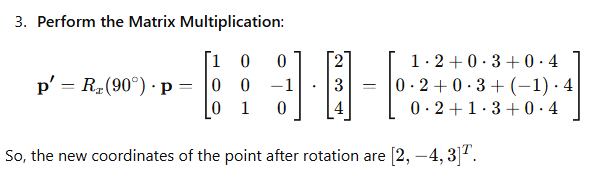

# 2.6.3 Representation of Combined Transformations
# Pre-Multiplication relative to the Reference Frame

- Note that each transformation and rotation is pre-multiplied relative to the Reference Frame.
- The order of matrices written is the opposite of the order of transformations performed.

Example 2.8

In [29]:
p = np.array([[7], [3], [1], [1]])
p

array([[7],
       [3],
       [1],
       [1]])

In [30]:
r = math.radians(90)

# Fixed Reference Frame
rX = np.array([
    [1, 0, 0, 0],
    [0, math.cos(r), -math.sin(r), 0],
    [0, math.sin(r), math.cos(r), 0],
     [0, 0, 0, 1]
])

rY = np.array([
    [math.cos(r), 0, math.sin(r), 0],
    [0, 1, 0, 0],
    [-math.sin(r), 0, math.cos(r), 0],
     [0, 0, 0, 1]
])

rZ = np.array([
    [math.cos(r), -math.sin(r), 0, 0],
    [math.sin(r), math.cos(r), 0, 0],
    [0, 0, 1, 0],
     [0, 0, 0, 1]
])

# Moving Current Frame
rN = np.array([
    [1, 0, 0, 0],
    [0, math.cos(r), -math.sin(r), 0],
    [0, math.sin(r), math.cos(r), 0],
     [0, 0, 0, 1]
])

rO = np.array([
    [math.cos(r), 0, math.sin(r), 0],
    [0, 1, 0, 0],
    [-math.sin(r), 0, math.cos(r), 0],
     [0, 0, 0, 1]
])

rA = np.array([
    [math.cos(r), -math.sin(r), 0, 0],
    [math.sin(r), math.cos(r), 0, 0],
    [0, 0, 1, 0],
     [0, 0, 0, 1]
])


In [31]:
trans = np.array([[4], [-3], [7], [1]])
trans

array([[ 4],
       [-3],
       [ 7],
       [ 1]])

In [32]:
T = np.array([
    [1, 0, 0, 4],
    [0, 1, 0, -3],
    [0, 0, 1, 7],
    [0, 0, 0, 1]
])

In [33]:
T @ rY @ rZ @ p 

array([[ 5.],
       [ 4.],
       [10.],
       [ 1.]])

Example 2.9

In [34]:
rY @ T @ rZ @ p

array([[ 8.],
       [ 4.],
       [-1.],
       [ 1.]])

- So the above examples are pre-multiplied by the Current Frame
- The translations and rotations are relative to the Reference Frame
- When a transformation (translation or rotation) is performed, the entire space relative to the Reference Frame is moved.

# 2.6.4 Transformations Relative to the Current (Moving) Frame
# Post-Multiplication relative to the Current Frame

- In this section, it's the current moving frame that performs the transformation
- So the translations and rotations are relative to the N, O and A axis
- The matrices in this case are post-multiplied by the Current Frame, this includes the point in space P 
- Okay so my understanding of pre and post multiplication was wrong by the looks of it

In [35]:
p

array([[7],
       [3],
       [1],
       [1]])

Post Multiplication Transforms the Current Frame
- 90 degree A axis
- Translation
- 90 degree O axis

In [36]:
np.round(rZ @ T @ rY @ p,2)

array([[0.],
       [5.],
       [0.],
       [1.]])

Pre Multiplication Transforms the Reference Frame
- 90 degree Z axis
- Translation
- 90 degree Y Axis

In [37]:
np.round(rY @ T @ rZ @ p,2)

array([[ 8.],
       [ 4.],
       [-1.],
       [ 1.]])

# 2.6.5 Mixed Transformations Relative to Rotating and Reference Frame

Pre-Multiplication - relative to fixed Reference Frame
- Performed in order left to right
- Using the X, Y and Z axis
- P<sub>Transformed</sub> = T $\cdot$ rX $\cdot$ P

In [38]:
T @ rX @ p

array([[11.],
       [-4.],
       [10.],
       [ 1.]])

Post-Multiplication - relative to moving Current Frame
- Performed in order right to left
- Using the N, O and A axis
- P<sub>Transformed</sub> = rX $\cdot$ T $\cdot$ P

In [39]:
rX @ T @ p

array([[ 1.1000000e+01],
       [-8.0000000e+00],
       [ 4.4408921e-16],
       [ 1.0000000e+00]])

Example 2.11

In [40]:
B = np.array([[1], [3], [2], [1]])

In [41]:
tO = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 2],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
tY = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 3],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

In [42]:
tY @ rX @ tO @ rA @ B

array([[-3.],
       [ 1.],
       [ 3.],
       [ 1.]])

Example 2.12

In [43]:
F = np.array([[3], [2], [6], [1]])

In [44]:
tA = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 3],
    [0, 0, 0, 1]
])

r = math.radians(30)
rY = np.array([
    [math.cos(r), 0, math.sin(r), 0],
    [0, 1, 0, 0],
    [-math.sin(r), 0, math.cos(r), 0],
     [0, 0, 0, 1]
])


In [45]:
rX @ rY @ -rO @ tA @ F

array([[-6.29422863],
       [-7.09807621],
       [-2.        ],
       [-1.        ]])

# 2.7 Inverse of Transformation Matrices

- The goal rom the example is to solve the Transformation Matrix of the robot's Hand relative to the robot's Base:
- <sup>R</sup>T<sub>H</sub>
- So we're doing similar operations to solving algebraic equations, but different as explained below:
- Algebra Equation ($\cdot$ is multiplication):  
3 $\cdot$ x = 12  
3 $\cdot$ x / 3 = 12 / 3  
x = 4  

- Matrix Equation ($\cdot$ is Dot Product):  
A $\cdot$ X = B  
A<sup>-1</sup> $\cdot$ B = X

In [46]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

In [47]:
A

array([[1, 2],
       [3, 4]])

In [48]:
A_inv = np.linalg.inv(A)
A_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [49]:
X = np.dot(A_inv, B)
X

array([[-3., -4.],
       [ 4.,  5.]])

In [50]:
A_inv @ B

array([[-3., -4.],
       [ 4.,  5.]])

In [51]:
A @ X

array([[5., 6.],
       [7., 8.]])

Figure 2.26

In [52]:
import numpy as np

UTR = np.array([
    [0.866, -0.5, 0, 2],
    [0.5, 0.866, 0, 3],
    [0, 0, 1, 4],
    [0, 0, 0, 1]
])

UTP = np.array([
    [1, 0, 0, 1],
    [0, 1, 0, 2],
    [0, 0, 1, 3],
    [0, 0, 0, 1]
])

PTE = np.array([
    [0.707, -0.707, 0, 1],
    [0.707, 0.707, 0, 2],
    [0, 0, 1, 1],
    [0, 0, 0, 1]
])

HTE = np.array([
    [1, 0, 0, 1],
    [0, 1, 0, 1],
    [0, 0, 1, 1],
    [0, 0, 0, 1]
])

In [53]:
UTR_inv = np.linalg.inv(UTR)
HTE_inv = np.linalg.inv(HTE)

In [54]:
UTR_inv @ UTR @ RTH @ HTE @ HTE_inv

NameError: name 'RTH' is not defined

In [ ]:
print(np.round(UTR_inv @ UTR))
print(HTE @ HTE_inv)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
RTH = UTR_inv @ UTP @ PTE @ HTE_inv

print(RTH)

[[ 0.9658045  -0.25877339  0.         -0.20700911]
 [ 0.25877339  0.9658045   0.         -0.35853978]
 [ 0.          0.          1.         -1.        ]
 [ 0.          0.          0.          1.        ]]


Figure 2.29

# Inverse Unitary 3x3 Matrices
- A matrix where it's Transpose is the same as it's Inverse is called a unitary matrix.
- All rotation matrices are unitary, which means their Inverse is the same value as their Transpose.

In [ ]:
theta = np.radians(40)
Rot_x_40 = np.array([
    [1, 0, 0],
    [0, np.cos(theta), -np.sin(theta)],
    [0, np.sin(theta), np.cos(theta)]
])
Rot_x_40

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.76604444, -0.64278761],
       [ 0.        ,  0.64278761,  0.76604444]])

In [ ]:
Rot_x_40_Trans = Rot_x_40.T
Rot_x_40_linalg_Inv = np.linalg.inv(Rot_x_40)

In [ ]:
print(Rot_x_40_Trans)
print(Rot_x_40_linalg_Inv)

[[ 1.          0.          0.        ]
 [ 0.          0.76604444  0.64278761]
 [ 0.         -0.64278761  0.76604444]]
[[ 1.          0.          0.        ]
 [ 0.          0.76604444  0.64278761]
 [ 0.         -0.64278761  0.76604444]]


In [ ]:
# Verify that applying the inverse rotation returns the frame to the original
np.round(np.dot(Rot_x_40_Trans, Rot_x_40))

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])

In [ ]:
np.round(np.dot(Rot_x_40_linalg_Inv, Rot_x_40))

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0.,  0.,  1.]])

# Inverse Homogenous 4x4 Matrices

- For Homogenous matrices, the inverse can be written by splitting the matrix into two components and performing the following:
1. The rotation unitary matrix is simply be transposed
2. The position matrix (position vector) - becomes the negative Dot Product of the newly arranged vectors 
- See figure 2.31

In [ ]:
M = np.array([
    [0.866, -0.5, 0, 2],
    [0.5, 0.866, 0, 3],
    [0, 0, 1, 4],
    [0, 0, 0, 1]
])

In [ ]:
M.T # Just transposes the position column into a row?

array([[ 0.866,  0.5  ,  0.   ,  0.   ],
       [-0.5  ,  0.866,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  1.   ,  0.   ],
       [ 2.   ,  3.   ,  4.   ,  1.   ]])

In [ ]:
np.linalg.inv(M) # Actually calculates the Negative Dot Product in the last column

array([[ 0.86603811,  0.500022  ,  0.        , -3.23214221],
       [-0.500022  ,  0.86603811,  0.        , -1.59807032],
       [ 0.        ,  0.        ,  1.        , -4.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

Example 2.14

In [ ]:
M = np.array([
    [0.5, 0, 0.866, 3],
    [0.866, 0, -0.5, 2],
    [0, 1, 0, 5],
    [0, 0, 0, 1]
])

In [ ]:
M_inv = np.linalg.inv(M)
M_inv

array([[ 0.500022  ,  0.86603811,  0.        , -3.23214221],
       [ 0.        ,  0.        ,  1.        , -5.        ],
       [ 0.86603811, -0.500022  ,  0.        , -1.59807032],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [ ]:
np.round(M @ M_inv)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Example 2.15

In [ ]:
FiveTcam = np.array([
    [0, 0, -1, 3],
    [0, -1, 0, 0],
    [-1, 0, 0, 5],
    [0, 0, 0, 1]
])

FiveTH = np.array([
    [0, -1, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 1, 4],
    [0, 0, 0, 1]
])

CamTobj = np.array([
    [0, 0, 1, 2],
    [1, 0, 0, 2],
    [0, 1, 0, 4],
    [0, 0, 0, 1]
])

HTE = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 3],
    [0, 0, 0, 1]
])

In [ ]:
ETObj = np.linalg.inv(HTE) @ np.linalg.inv(FiveTH) @ FiveTcam @ CamTobj
ETObj

array([[-1.,  0.,  0., -2.],
       [ 0.,  1.,  0.,  1.],
       [ 0.,  0., -1., -4.],
       [ 0.,  0.,  0.,  1.]])

In [ ]:
ETH = np.linalg.inv(HTE) 
HTFive = np.linalg.inv(FiveTH)
ETObj = ETH @ HTFive @ FiveTcam @ CamTobj
ETObj

array([[-1.,  0.,  0., -2.],
       [ 0.,  1.,  0.,  1.],
       [ 0.,  0., -1., -4.],
       [ 0.,  0.,  0.,  1.]])

Example 2.16

In [ ]:
import sympy as sp
θ, α = sp.symbols('θ α')
Cθ = sp.cos(θ)
Sθ = sp.sin(θ)
Cα = sp.cos(α)
Sα = sp.sin(α)

In [ ]:
T = sp.Matrix([
    [Cθ, -Sθ*Cα, Sθ*Sα],
    [Sθ, Cθ*Cα, -Cθ*Sα],
    [0, Sα, Cα]
])

In [ ]:
sp.pprint(T)

⎡cos(θ)  -sin(θ)⋅cos(α)  sin(α)⋅sin(θ) ⎤
⎢                                      ⎥
⎢sin(θ)  cos(α)⋅cos(θ)   -sin(α)⋅cos(θ)⎥
⎢                                      ⎥
⎣  0         sin(α)          cos(α)    ⎦


In [ ]:
Rz_θ = sp.Matrix([
    [Cθ, -Sθ, 0],
    [Sθ, Cθ, 0],
    [0, 0, 1]
])

In [ ]:
Rx_α = sp.Matrix([
    [1, 0, 0],
    [0, Cα, -Sα],
    [0, Sα, Cα]
])
Rx_α


Matrix([
[1,      0,       0],
[0, cos(α), -sin(α)],
[0, sin(α),  cos(α)]])

# 2.8 Forward and Inverse Kinematics of Robots

# 2.9 Forward and Inverse Kinematic Equations: Position

# 2.9.1 Cartesian (Gantry, Rectangular) Coordinates

In [57]:
print("Involves 3 linear coordinates on x,y and z")
p = np.array([[3],[2],[1]])
p

Involves 3 linear coordinates on x,y and z


array([[3],
       [2],
       [1]])

In [59]:
np.array([
    [0, 0, -1, 3],
    [0, -1, 0, 0],
    [-1, 0, 0, 5],
    [0, 0, 0, 1]
])

array([[ 0,  0, -1,  3],
       [ 0, -1,  0,  0],
       [-1,  0,  0,  5],
       [ 0,  0,  0,  1]])

# 2.9.2 Cylindrical Coordinates

- Involves two linear and one rotational coordinate
1. Translation along the X axis
2. Rotation around Z axis
3. Translation along Z
- The Transformations are relative to the Universe frame
- Hence the Total Transformation is found by pre-multiplying by each matrix

Example 2.18

In [77]:
v = np.array([[4,5,6]]).T
Px = 5
Py = 4
Pz = 6

In [78]:
alpha_rad = math.atan2(Py, Px)
alpha_deg = math.degrees(alpha_rad)

In [80]:
Px / math.cos(alpha_rad)


6.403124237432849

In [81]:
Py / math.sin(alpha_rad)

6.4031242374328485

# 2.9.3 Spherical Coordinates

# 2.9.4 Articulated Coordinates

# 2.10 Forward and Inverse Kinematic Equations: Orientation

# 2.10.1 Roll, Pitch, Yaw Angles

- Firstly, we are assuming the current Moving Frame is parallel to the reference frame
- Otherwise the final orientation of the robots hand is a combination of the previous orientation, post-multiplied by RPY
- To maintain the position of the frame and only rotate it to the desired orientation, we post-multiply the frame by RPY

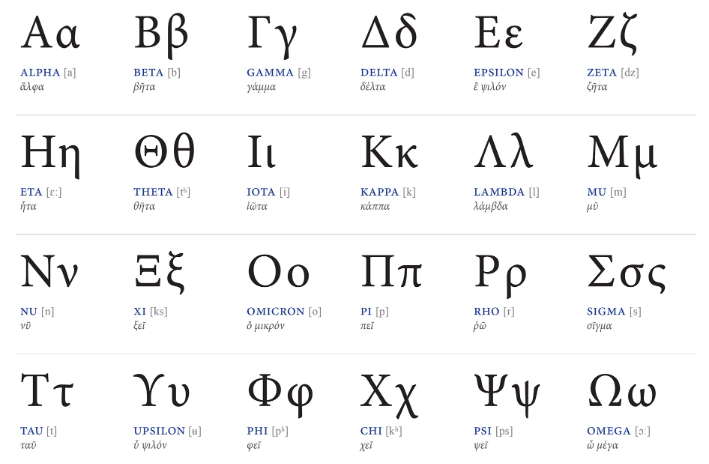

In [92]:
# Fixed Reference Frame
rX = np.array([
    [1, 0, 0, 0],
    [0, math.cos(r), -math.sin(r), 0],
    [0, math.sin(r), math.cos(r), 0],
     [0, 0, 0, 1]
])

rY = np.array([
    [math.cos(r), 0, math.sin(r), 0],
    [0, 1, 0, 0],
    [-math.sin(r), 0, math.cos(r), 0],
     [0, 0, 0, 1]
])

rZ = np.array([
    [math.cos(r), -math.sin(r), 0, 0],
    [math.sin(r), math.cos(r), 0, 0],
    [0, 0, 1, 0],
     [0, 0, 0, 1]
])

# Moving Current Frame
r = math.radians(math.degrees(90))
rN = np.array([
    [1, 0, 0, 0],
    [0, math.cos(r), -math.sin(r), 0],
    [0, math.sin(r), math.cos(r), 0],
     [0, 0, 0, 1]
])

rO = np.array([
    [math.cos(r), 0, math.sin(r), 0],
    [0, 1, 0, 0],
    [-math.sin(r), 0, math.cos(r), 0],
     [0, 0, 0, 1]
])

rA = np.array([
    [math.cos(r), -math.sin(r), 0, 0],
    [math.sin(r), math.cos(r), 0, 0],
    [0, 0, 1, 0],
     [0, 0, 0, 1]
])

In [101]:
rM = (rN @ rO @ rA)
np.round(rM)

array([[ 0.,  0.,  1.,  0.],
       [-1., -1.,  0.,  0.],
       [ 1., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [100]:
np.round(np.linalg.inv(rN) @ rM)

array([[ 0.,  0.,  1.,  0.],
       [ 1., -0., -0.,  0.],
       [ 0.,  1., -0.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [102]:
np.round(rO @ rA)

array([[ 0.,  0.,  1.,  0.],
       [ 1., -0.,  0.,  0.],
       [ 0.,  1., -0.,  0.],
       [ 0.,  0.,  0.,  1.]])

Example 2.21

In [104]:
RTP = np.array([
    [0.233, 0.255, 0.939, 4.24],
    [0.113, 0.951, -0.287, 2.65],
    [-0.966, 0.173, 0.192, 6],
     [0, 0, 0, 1]
])

In [108]:
phi_A = math.atan2(0.113, 0.233)
math.degrees(phi_A).__round__()

26

In [136]:
phi_O = math.atan2(-RTP[2,0], (RTP[0,0] * math.cos(phi_A)) + (RTP[1,0] * math.sin(phi_A)))
math.degrees(phi_O).__round__()

75

In [149]:
phi_N = math.atan2(-RTP[1,2] * math.cos(phi_A) + RTP[0,2] * math.sin(phi_A),RTP[1,1] * math.cos(phi_A) - RTP[0,1] * math.sin(phi_A))
math.degrees(phi_N).__round__()


42

Example 2.22

This example is difficult

# 2.10.2 Euler Angles

# 2.12 Denavit-Hartenburg Representation

- Published in 1955
- Used to represent and model robots and to derive their equations of motion
- The technique is now a standard and essential to learn
- Very simple way to model links and joints of any configuration 
- Transformations from any coordinates can modelled **(Cartesian, cylindrical, spherical, Euler and RPY)**
- It can represent all revolute articulated robots, SCARA robots
- The direct modelling done previously is easy and fast, however DH allows for:
  - Analyses of differential motions / Jacobians / Dynamic Analysis / Force Analysis

In order to analyze and model any robot configuration:   
1. Assign a reference frame to each joint
2. Use a General Procedure to transform from one joint to the next
3. Combining all the transformations will give the the robot's total transformation matrix

- The first joint is labelled ***"Joint n"***
- The second joint is labelled ***"Joint n+1"***
- The third joint is labelled ***"Joint n+2"***

- The first link is called ***link<sub>n</sub>***
- The second link is called ***link<sub>n+1</sub>***

- We assign a Local Reference Frame to all of the joints
- X axis - Discussed further below
- Y Axis - We don't bother with (We know it's perpendicular to X and Z, and isn't used in DH representation)
- Z axis - All joints are represented with a Z Axis, the Z axis is represents by the Thumb 
  - If the joint is revolute, the Z axis is in the direction of rotation 
  - If the joint is prismatic, the Z Axis is along the direction of the linear movement

- The first Z Axis (representing the first joint) is labelled ***Z<sub>n-1</sub>***
- The second Z Axis (representing the second joint) is labelled ***Z<sub>n</sub>***
- The third Z Axis (representing the third joint) is labelled ***Z<sub>n+1</sub>***

Example:
- **Joint n** > **Axis Z<sub>n-1</sub>** > **Link<sub>n</sub>**
- **Joint n+1** > **Axis Z<sub>n</sub>** > **Link<sub>n+1</sub>**

Joint Variables:
- If the joint is revolute - rotations around the Z axis are represented by ***Theta***
- If the joint is prismatic - the length of linear movements is represented by ***d***

The Common Normal

- Joints are not always parallel or intersecting 
- As a result the Z Axis of two joints are skewed to one another
- There is always one line or axis that is mutually perpendicular to any two skew lines
- This axis is orthogonal to both Z axis
- But not the X Axis to both
- Is it the shortest line between the two Z axis

- Instead we assign the X axis of the Local Reference Frame in the direction of the Common Normal from the Previous axes
- Quote:
  -   "We always assign the x-axis of the local reference frame in the direction of the common normal between the previous and current axes."
- Collinear:
  - "Points 
𝐴
A, 
𝐵
B, and 
𝐶
C are collinear if they all lie on the same straight line. For instance, if point 
𝐴
A is at (1, 2), point 
𝐵
B is at (2, 4), and point 
𝐶
C is at (3, 6), they are collinear because they lie on the line 
𝑦
=
2
𝑥
y=2x."

- We can assign coordinate Frames to all joints with the following special cases:
1. If the two Z axis are parallel, then there's actually an infinite number of Common Normals between them. We then pick the Common Normal that is collinear with the Common Normal of the previous joint.
2. If the two Z axis are intersecting, there is no Common Normal between them (or it has a zero length). We assign the X axis along a line perpendicular to the plane formed by the two axes. 
   - This means the Common Normal is a line perpendicular to the plane containing the two Z axes.
   - this is equivalent of picking the direction of the cross-product of the two Z axis

# Parameters and variables

##### Joint Variables
- ***Theta*** represents a rotation about the Z axes
- ***d*** represents the distance on teh Z axes between two successive Common Normals (or **Joint Offset**)

##### Joint Physical Parameters
- ***a*** represents the length of each Common Normal (the length of a link)
- ***alpha*** represents the angle between two successive Z axes (also called the **Angle Twist**)

# General Procedure for Transformations

- The following four standard motions are performed to get from one local reference frame to another:
1. Rotation
2. Translation
3. Translation
4. Rotation


- Repeating the exact same four motions along the robot results in the total transformation between reference frame and end frame
- Starting with the robot's reference frame, we can transform to the first joint, second joint etc, until we reach the end effector 
- This sequence of four motions remains the same between any two frames

- The Transformation <sup>n</sup>T<sub>n+1</sub> is between two successive frames
- It's called A<sub>n+1</sub> and represents the four movements
- Each movement is represented by a matrix
- Each transformation (translation and rotation) are relative to the current frame
- All matrices are post-multiplied
- Post-multiplied means in-order of steps performed
- Pre-Multiplied - means the order of matrices written is the opposite of the order of transformations performed.

- We would expect to have one A<sub>n+1</sub> matrix per joint.  
<sup>n</sup>T<sub>n+1</sub> = A<sub>n+1</sub>  
A<sub>n+1</sub> = Rot( <sub>z, theta<sub>n+1</sub></sub> ) $\cdot$ Trans( 0,0,d<sub>n+1</sub> ) $\cdot$ Trans( a<sub>n+1</sub>,0,0 ) $\cdot$ Rot( x, a<sub>n+1</sub> )

Further example:  
<sup>R</sup>T<sub>H</sub> = <sup>R</sup>T<sub>1</sub> $\cdot$ <sup>1</sup>T<sub>2</sub> $\cdot$ <sup>2</sup>T<sub>3</sub> ... <sup>n</sup>T<sub>n+1</sub> = A<sub>1</sub> $\cdot$ A<sub>2</sub> $\cdot$ A<sub>3</sub> ... A<sub>n</sub> 
 - For a robot with 6 DOF there could be six A<sub>n</sub> matrices.

# DH Parameter Table

- To facilitate teh calculation of the A<sub>n</sub> matrices we use a parameter table
- Joint and link parameters from the schematic drawing of the robot are determined
- These values are entered into the A<sub>n</sub> matrix

Example 2.24  
- We apply the DH representation to derive the Forward Kinematic equations

- We have two revolute joints, hence the unknowns are the angles θ<sub>1</sub> and θ<sub>2</sub>
- The transformation matrices A<sub>1</sub> and A<sub>2</sub> represent the transformations from frame 0 to frame 1 and from frame 1 to frame 2, respectively.

- The transformation matrices A<sub>1</sub> and A<sub>2</sub> are derived from the DH parameters.

- C<sub>1</sub> and S<sub>1</sub> represent Cos(θ<sub>1</sub>) and Sin(θ<sub>1</sub>)
- C<sub>2</sub> and S<sub>2</sub> represent Cos(θ<sub>2</sub>) and Sin(θ<sub>2</sub>)

A<sub>1</sub> =
\begin{bmatrix}
C1 & -S1 & 0 & a1 C1 \\
S1 & C1 & 0 & a1 S1 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}

A<sub>2</sub> =
\begin{bmatrix}
C2 & -S2 & 0 & a2 C2 \\
S2 & C2 & 0 & a2 S2 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}



## Combining Transformations

The overall transformation from frame 0 to frame 2 is given by multiplying A<sub>1</sub> and A<sub>2</sub>  

<sup>0</sup>T<sub>H</sub> = A<sub>1</sub> $\cdot$ A<sub>2</sub>

Simplifications using trigonometric identities can be made:

C<sub>1</sub>C<sub>2</sub> - S<sub>1</sub>S<sub>2</sub> = Cos(θ<sub>1</sub> + θ<sub>2</sub>) = C<sub>12</sub>

S<sub>1</sub>C<sub>2</sub> + C<sub>1</sub>S<sub>2</sub> = Sin(θ<sub>1</sub> + θ<sub>2</sub>) = S<sub>12</sub>


After simplification, the overall transformation matrix is:  

<sup>0</sup>T<sub>H</sub> = 
\begin{bmatrix}
C12 & -S12 & 0 & a2 C12 + a1 C1 \\
S12 & C12 & 0 & a2 S12 + a1 S1 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}